In [1]:
from keras.applications import VGG16

In [2]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
from keras import models
from keras import layers

In [6]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [9]:
conv_base.trainable = False

In [10]:
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_dir = r'E:\2--jupyter_notebook\python deeplearning\datasets\dog_cat_classify\cats_and_dogs_small\train'
validation_dir = r'E:\2--jupyter_notebook\python deeplearning\datasets\dog_cat_classify\cats_and_dogs_small\validation'
test_dir = r'E:\2--jupyter_notebook\python deeplearning\datasets\dog_cat_classify\cats_and_dogs_small\test'

In [15]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [17]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [18]:
import time
def current_time():
    return time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))

In [20]:
print('start ', current_time())
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
print('end ', current_time())

start  2019-03-20 23:03:05
Epoch 1/30
100/100 [==============================] - 17s 167ms/step - loss: 0.5830 - acc: 0.7075 - val_loss: 0.4428 - val_acc: 0.8340
Epoch 2/30
100/100 [==============================] - 15s 149ms/step - loss: 0.4711 - acc: 0.7930 - val_loss: 0.3569 - val_acc: 0.8660
Epoch 3/30
100/100 [==============================] - 15s 150ms/step - loss: 0.4106 - acc: 0.8315 - val_loss: 0.3241 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 15s 150ms/step - loss: 0.3933 - acc: 0.8260 - val_loss: 0.2793 - val_acc: 0.8950
Epoch 5/30
100/100 [==============================] - 15s 150ms/step - loss: 0.3783 - acc: 0.8270 - val_loss: 0.3013 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 15s 151ms/step - loss: 0.3735 - acc: 0.8315 - val_loss: 0.2663 - val_acc: 0.8950
Epoch 7/30
100/100 [==============================] - 15s 151ms/step - loss: 0.3543 - acc: 0.8455 - val_loss: 0.2641 - val_acc: 0.9060
Epoch 8/30
100/100 [========

In [21]:
model.save('vgg_16_small_dog_cat_2.h5')

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
Epochs = range(1, len(loss) + 1)

In [24]:
import matplotlib.pyplot as plt

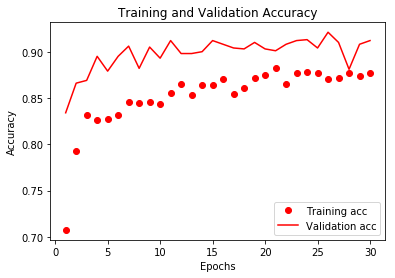

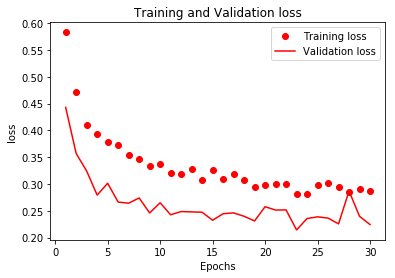

In [25]:
plt.plot(Epochs, acc, 'ro', label='Training acc')
plt.plot(Epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(Epochs, loss, 'ro', label='Training loss')
plt.plot(Epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()